# Step 1: Import Needed LibrariesImporting Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA

# Step 2: Read the experimental dataset

In [83]:
data = pd.read_csv('dataset.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Step 3: Shuffle the dataset to avoid bias

In [84]:
data = data.sample(frac=1, random_state=42)

# Step 4: Verify if the Target Class is Balanced or Not

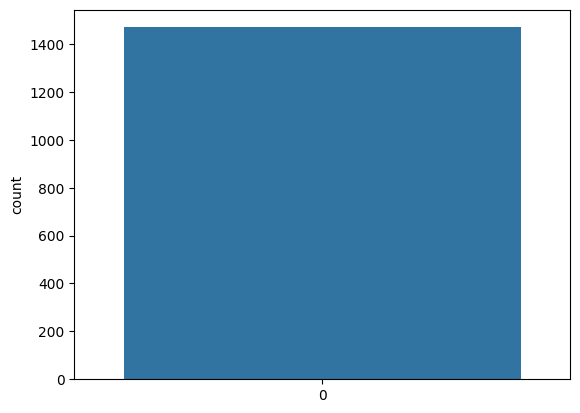

In [85]:
sns.countplot(data.Age > 25)
plt.show()

# Step 5: Split the Data into Training and Test Sets

In [86]:
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Histogram Graph and Attrition with Age

(array([22., 22., 47., 50., 31., 19., 12., 11., 12., 11.]),
 array([18., 22., 26., 30., 34., 38., 42., 46., 50., 54., 58.]),
 <BarContainer object of 10 artists>)

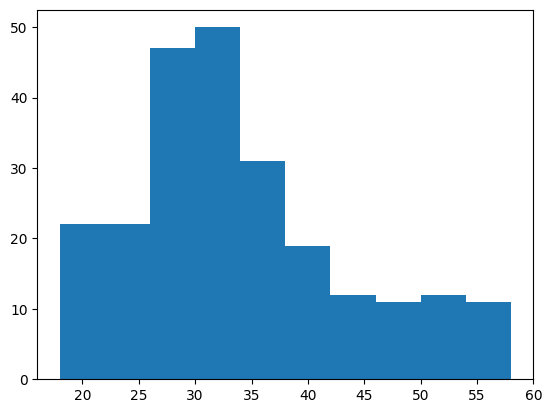

In [87]:
atr_yes = data[data['Attrition'] == 'Yes']
atr_no = data[data['Attrition'] == 'No']
plt.hist(atr_yes['Age'])

Attrition rate: Job Level vs Gender

<Axes: xlabel='Gender', ylabel='JobLevel'>

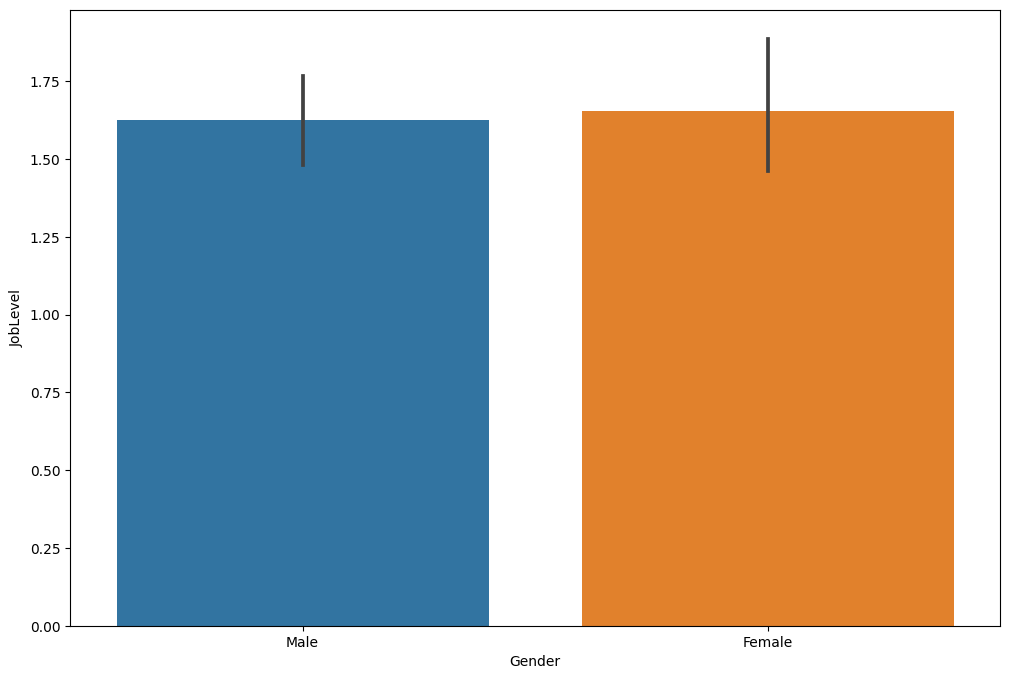

In [88]:
plt.figure(figsize=(12,8))
sns.barplot(x = data['Gender'], y = atr_yes['JobLevel'])

Attrition rate: Job Level vs Job Role

<Axes: xlabel='JobLevel', ylabel='JobRole'>

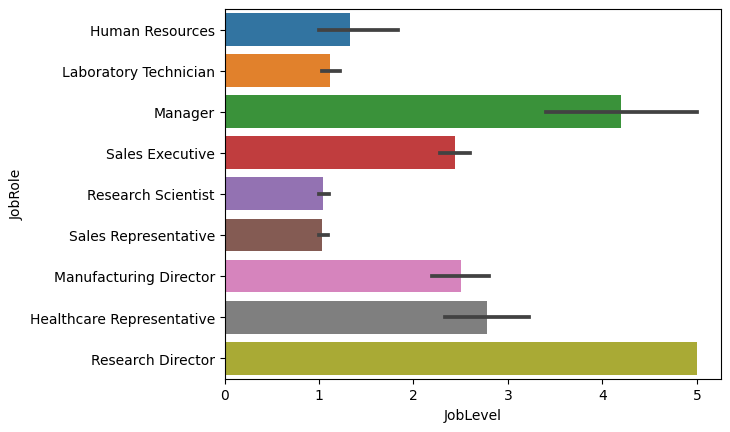

In [89]:
sns.barplot(x = data['JobLevel'], y = atr_yes['JobRole'])

Box Plot

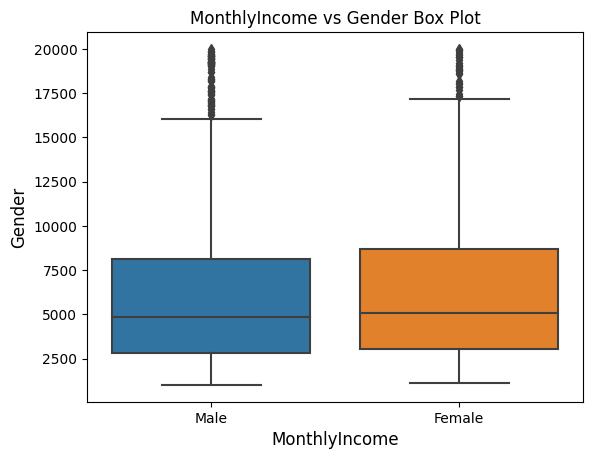

In [90]:
# sns.boxplot(data['Gender'], data['MonthlyIncome'])
sns.boxplot(data=data, x='Gender', y='MonthlyIncome')
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=12)      
plt.xlabel('MonthlyIncome', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.show()

Mean of  Incomes  vs Genders

In [91]:
avg_male = np.mean(data.MonthlyIncome[data.Gender == 'Male'])
avg_female = np.mean(data.MonthlyIncome[data.Gender == 'Female'])
print(avg_female/avg_male)

1.0479677155907092


# Step 6: Apply SMOTE to Balance the Target Class

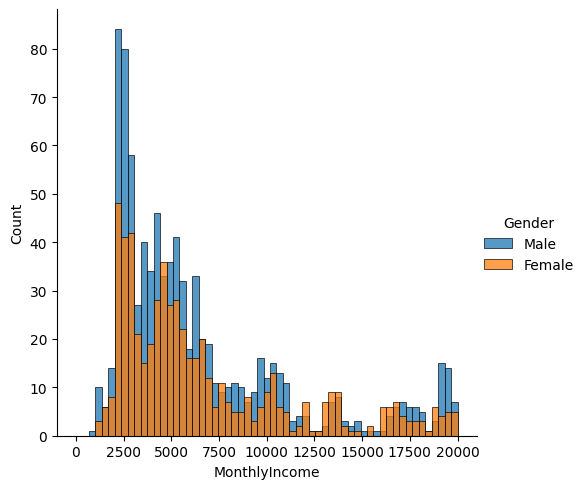

In [92]:
# Filter the data for each gender
male_income = data.MonthlyIncome[data.Gender == 'Male']
female_income = data.MonthlyIncome[data.Gender == 'Female']

# Create a FacetGrid and plot the histograms
g = sns.FacetGrid(data, hue='Gender', height=5)
g.map(sns.histplot, 'MonthlyIncome', bins=np.linspace(0, 20000, 60))
g.add_legend(title='Gender')

plt.show()

Interestingly, the males histogram does not seem to be more to the right.

# Step 7: Write some Common useful functions for Classification

In [93]:
# Function for K-Fold Cross Validation
def k_fold_cross_validation(model, X, y, k=5):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=k)
    return scores.mean()

# Function for Plotting Training and Test Datasets
def plot_train_test_data(X_train, y_train, X_test, y_test):
    plt.scatter(X_train, y_train, color='blue', label='Training Set')
    plt.scatter(X_test, y_test, color='red', label='Test Set')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Function for Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function for Calculating Feature Importance
def feature_importance(model, features):
    importance = model.feature_importances_
    indices = np.argsort(importance)
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()

Now we will look at the different departments

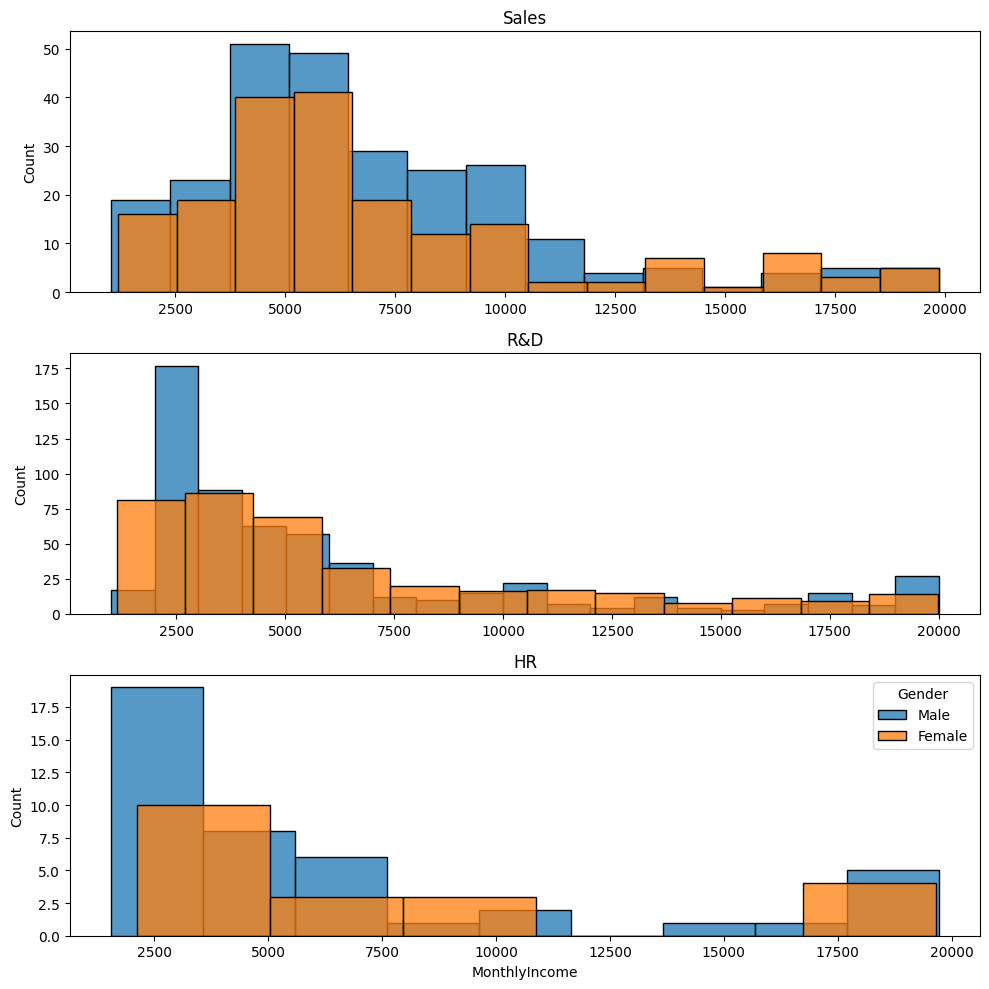

In [94]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.title('Sales')
sns.histplot(data=data[(data.Department == 'Sales') & (data.Gender == 'Male')], x='MonthlyIncome', label='Male')
sns.histplot(data=data[(data.Department == 'Sales') & (data.Gender == 'Female')], x='MonthlyIncome', label='Female')
plt.xlabel('')

plt.subplot(3, 1, 2)
plt.title('R&D')
sns.histplot(data=data[(data.Department == 'Research & Development') & (data.Gender == 'Male')], x='MonthlyIncome', label='Male')
sns.histplot(data=data[(data.Department == 'Research & Development') & (data.Gender == 'Female')], x='MonthlyIncome', label='Female')
plt.xlabel('')

plt.subplot(3, 1, 3)
plt.title('HR')
sns.histplot(data=data[(data.Department == 'Human Resources') & (data.Gender == 'Male')], x='MonthlyIncome', label='Male')
sns.histplot(data=data[(data.Department == 'Human Resources') & (data.Gender == 'Female')], x='MonthlyIncome', label='Female')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

The average male at the sales department still earns less than the average female, though the difference is smaller compared to the other department

# Step 8: Apply below listed common Classification Models

In [95]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Step 9: Evaluate the performance of all the Classification Models (Graphically)

Income Distribution with Job Level

Text(0, 0.5, 'Monthly Income')

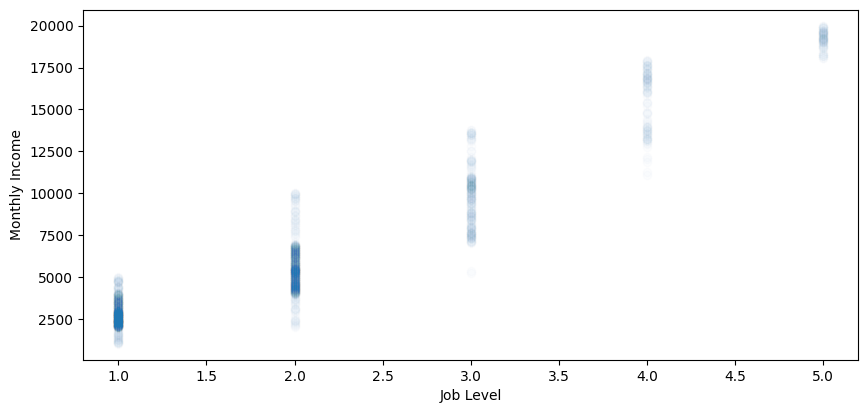

In [96]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.plot(data.JobLevel,data.MonthlyIncome,'o', alpha = 0.01)
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')

Total working years

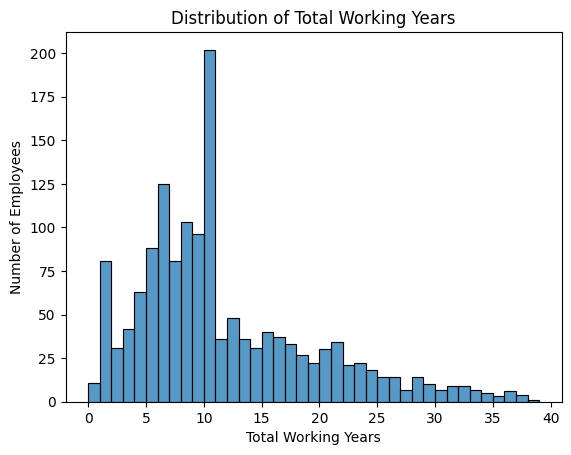

In [97]:
# sns.distplot(data.TotalWorkingYears, bins = np.arange(min(data.TotalWorkingYears),max(data.TotalWorkingYears),1))
# plt.ylabel('Number of Employees')
sns.histplot(data=data, x='TotalWorkingYears', bins=np.arange(min(data.TotalWorkingYears), max(data.TotalWorkingYears), 1))
plt.ylabel('Number of Employees')
plt.xlabel('Total Working Years')
plt.title('Distribution of Total Working Years')
plt.show()

Scatter Plot

Monthly / Daily vs Dally Rate Ratio

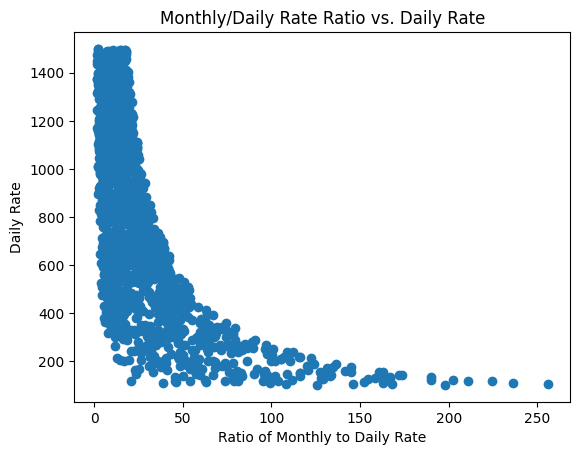

In [98]:
_ = plt.scatter((data['MonthlyRate'] / data['DailyRate']), data['DailyRate'])
_ = plt.xlabel('Ratio of Monthly to Daily Rate')
_ = plt.ylabel('Daily Rate')
_ = plt.title('Monthly/Daily Rate Ratio vs. Daily Rate')
plt.show()

Joint plots

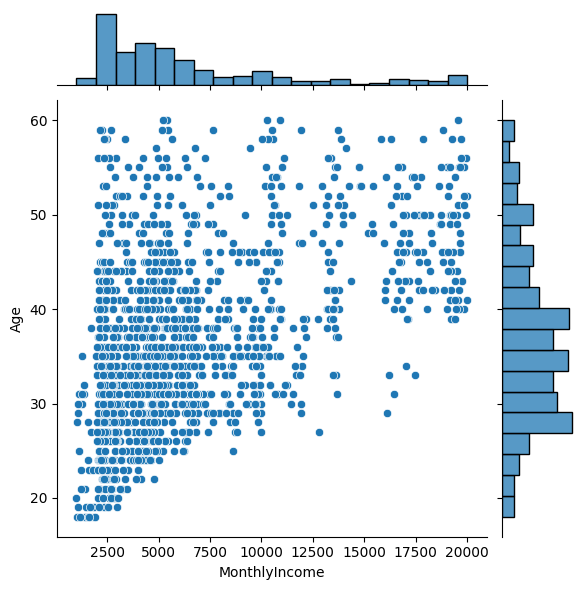

In [99]:
# sns.jointplot(data.MonthlyIncome ,data.Age, kind = "scatter")   
sns.jointplot(data=data, x='MonthlyIncome', y='Age', kind='scatter')
plt.show()

On an average, monthly income is less than 7k per month till age 40

# Step 10: Select and Conclude the best performing classification model for the given dataset

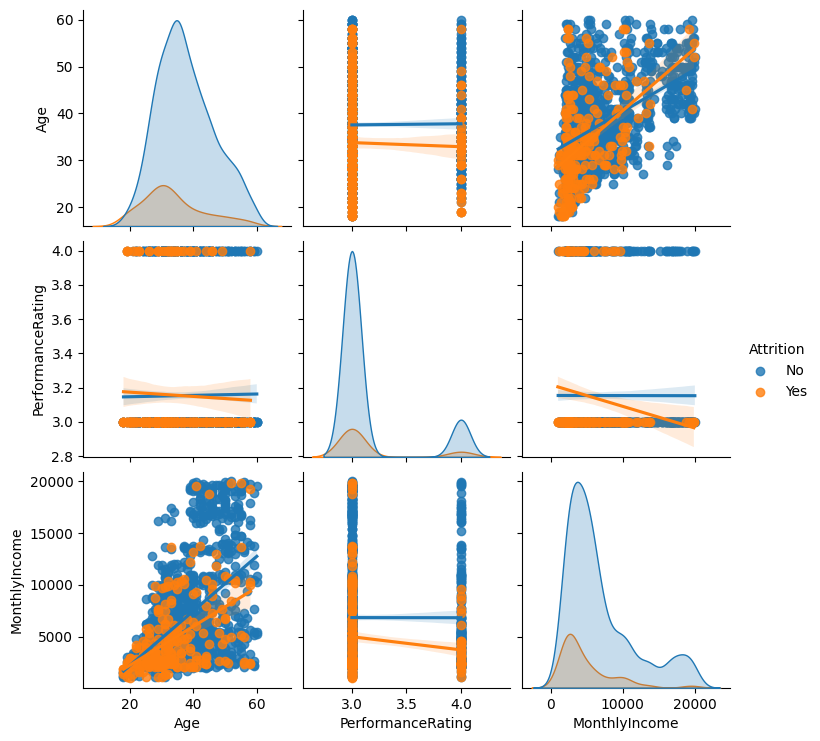

In [100]:
cont_col= ['Age', 'PerformanceRating','MonthlyIncome','Attrition']
sns.pairplot(data[cont_col], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()